# Predicting Customer Churn in SyriaTel to Enhance Customer Retention

## Introduction
This project we will be working with the SyriaTel Customer churn dataset named as Customer_churn, to solve our business problem.
The Aim of this project is to analyse and determine how the SyrianTel company can reduce customer churn, retain customers leading to inceased profits.

## Business Understanding

#### Business problem
The SyriaTel Company is a telecomunication business that would  like to address the issue of custonwer churnig by creating a prediction model to understand why they are facing a high churn rate and their customers preferring their competitors. The main goal of SyriaTel Company is to reducing churn rate, increse customer retention hence increasing profitability 


## Objectives
1. Identify factors that may lead to customer churn

2. To create a model that will predict customer which are at a high risk of churning

3. The relevant steps that should be taken to retain customers

## Data Understanding

Data Understanding is essential for identifying patterns, ensuring quality and making informed decisions based on accurate analysis.

In [1]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [2]:
import warnings 
warnings.filterwarnings("ignore") 

In [3]:
# loading the Dataset
df= pd.read_csv('customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# shape of the dataset
df.shape


(3333, 21)

The dataset has 3333 rows and 21 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#df numerical columns
df.describe() 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning

We do data cleaning to remove any duplicates deal with missing values and any other inconsistencies

In [7]:
# checking for null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
# checking for duplicates
df.duplicated().sum()

0

Coverting the churn column to be numeric, that is, 0 will be False and 1 will be True

In [9]:
#converting the churn column
df["churn"]= df["churn"].astype(int)

# Cheking for the data types of the dataset
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

The churn column has been successfully converted to a numeric type

## Exploratory Data Analysis

Exploratory Data Analysis helps us identify the correlation between the features in the dataset and the distribution of the variables. This is essential for feature engineering and modelling.



### Univariate Analysis

This involves the distribution of each feature of the dataset in order to understand their characteristics and identify any issues such as outliers.




#### Churn Distribution

The churn column is our target variable and it is categorical. We will ude a pie chart to display its distribution.

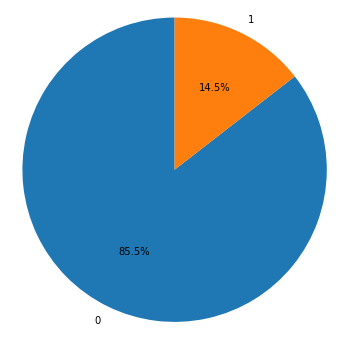

In [10]:
#displayng the number of churn counts and presenting it on a pie chart
churn_counts= df['churn'].value_counts()
#figure size
plt.figure(figsize= (6,6))
#creating the pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title = ("Churn Distribution")
plt.axis('equal')# this ensure that the pie chart is presented as a circle
plt.show()






0 is False
1 is True

The pie chart represents the distribution of customers who left(churned), vs those who stayed.
85.5% represents customers who did not churn 
14.5% represents customers who did churn, that is, they left the company

This imbalance suggests that customer retention is high, but the company should still analyse the reasons for churn to improve retention strategies.

### Distribution of  features

In [11]:
import pandas as pd
import matplotlib

print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)

Pandas version: 2.0.3
Matplotlib version: 3.7.5


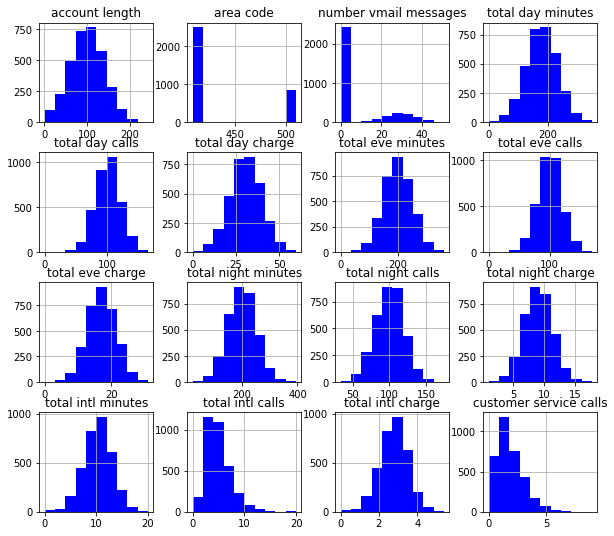

In [12]:
#plotting the the disrtibution of the rest of the features
df.drop(columns='churn').hist(figsize=(10,9), color='blue')
#plt.hist(hist_plot,figsize=(8,9), color='blue')
plt.show()

### Distribution of categorical features

In [13]:
#poltting categorical features
cat_features= df.drop('phone number', axis=1).select_dtypes(include=object).columns
for col in cat_features:
    print(col)
    print(df[col].unique())

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
international plan
['no' 'yes']
voice mail plan
['yes' 'no']


#### Subscription plan distributions 

There are three categorical features as shown above; state, international plan, voice mail plan that we will be analysing.

We will create a function that will be used in plotting the distribution of categorical features

In [14]:
#creating the function
def plot_cat_distributions(df, feature):
   plt.figure(figsize=(10,9))
   sns.countplot(x=feature, data=df,color='green',order=df[feature].value_counts().index)
   plt.xticks(rotation=90)
   plt.show()

#### distribution for the state column

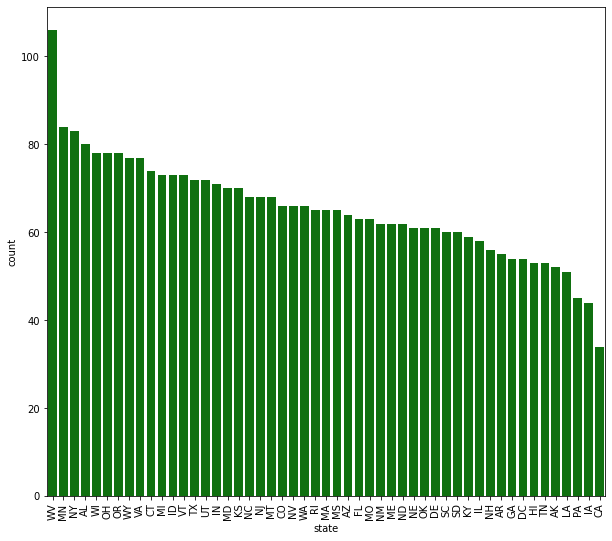

In [15]:
plot_cat_distributions(df,'state')

#### Finding

Most of the consumers are from West Virginia, Minnesota, New York, Alabama, Wisconsin. 
while California has the list number of consumers.

#### International plan distribution

In [16]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

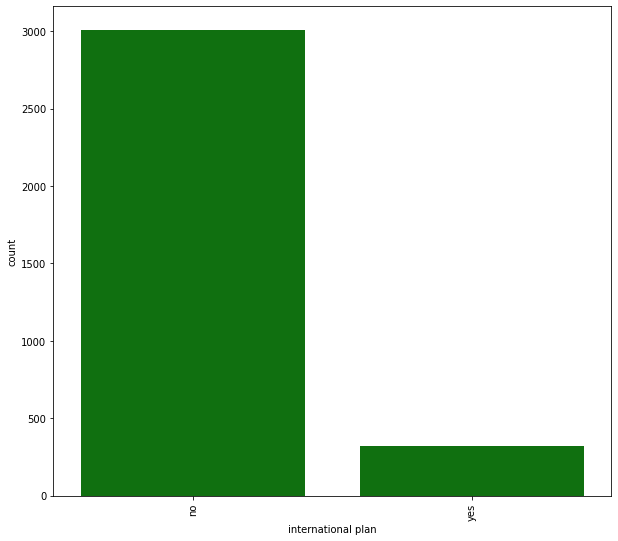

In [17]:
#Plotting international plan
plot_cat_distributions(df,'international plan')

#### Finding

Only 323 customers have subscribed to the are  international plans out of 3333.


### Voice Main Plan Distribution

In [18]:
df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

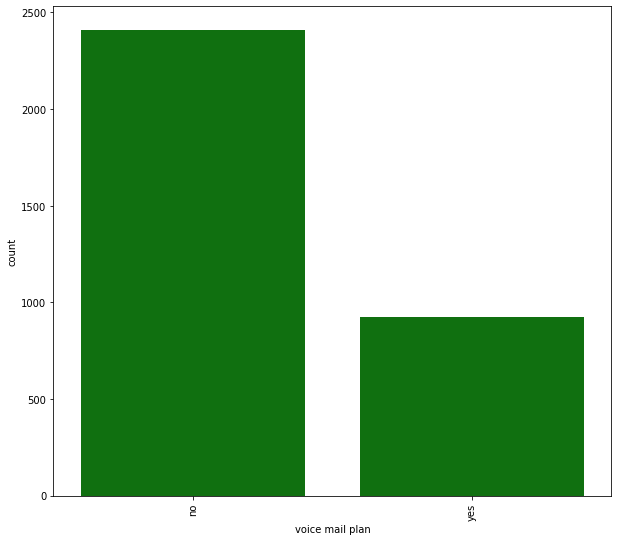

In [19]:
plot_cat_distributions(df, 'voice mail plan')

#### Finding

Only 922 customers have subscribed to the voive mail plan services out of 3333.

#### Conclusion
From the above distributions we can conclude that there are more subscribers of voice mail plan compared to the international plan subscribers.

#### Minutes Distribution

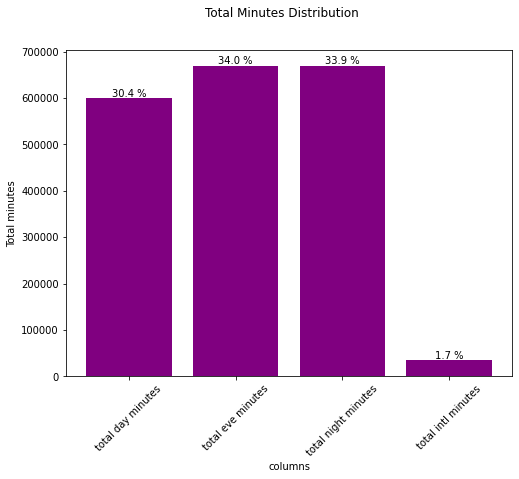

In [41]:
# define the column names
column_sum= [ 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
# sum for each column
sums= df[column_sum].sum()
plt.figure(figsize=(8,6))
#plot the histogram bars
bars= plt.bar(sums.index, sums, color='purple')
plt.xlabel('columns')
plt.ylabel('Total minutes')
plt.suptitle('Total Minutes Distribution')

#Add percentage labels
for bar in bars:
    height= bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2., height+10,f"{height/sum(sums)*100:.1f} %", ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

The above bar graph shows total minutes across different call categories.
The total evening minutes have the highest percentage compared to other call categories. This shows that most customers spend more time on calls in the evening. 

### Correlation of Features

We will look at features that have the highest correlation with the target variable(churn)

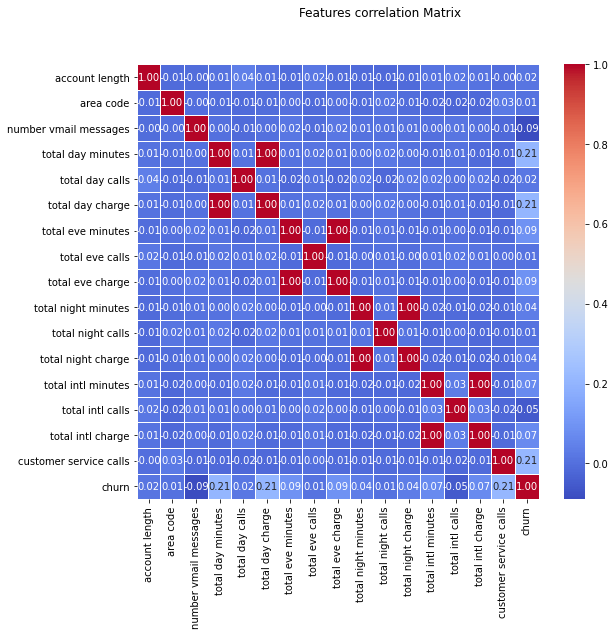

In [21]:
#numeric columns
numerical_cols= df.select_dtypes(include=['number'])

#the correlation matrix
corr_matrix= numerical_cols.corr()

#plot the heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.suptitle('Features correlation Matrix')
plt.show()

Most features have low correlation with each other close to zero.

There is perfect positive correlations  between:

total eve charge and total eve minutes

total day charge and total day minutes

total night charge and total night minutes

total intl charge and total intl minutes

This is expected because call charges depend on call minutes.

### Customer Service Calls vs Churn

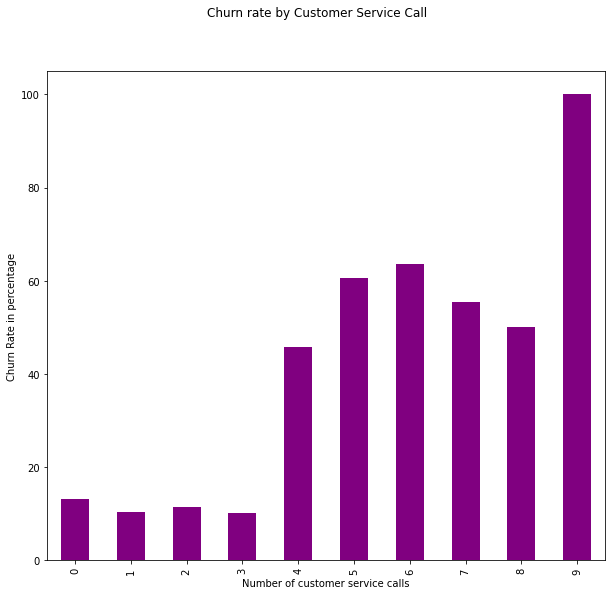

In [22]:
#churn rate percentage for each customer service  call
churn_rate= df.groupby('customer service calls')['churn'].mean()*100

#Plot a bar plot
churn_rate.plot(kind='bar', figsize=(10,9), color='purple')

#title and labels
plt.suptitle('Churn rate by Customer Service Call')
plt.xlabel('Number of customer service calls')
plt.ylabel('Churn Rate in percentage')

plt.show()

#### Finding

As the number of calls increases the rate of churn also increases. However after the sixth call the rate of churn is evident suggesting that more interactions could make customers more unhappy, causing more people to churn. 

#### Preparing  data for machine learning

### Multicollinearity of features

In [23]:
# independent variables to check for multicollinearity
X= df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']]

#Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

# VIF is  the measure of multicollineality in a regression model
#

,feature,VIF
0,total day minutes,9.673057
1,total eve minutes,12.026619
2,total night minutes,12.000415
3,total intl minutes,10.844008


In [24]:
# drop columns with high correlation
to_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
df= df.drop(to_drop, axis=1)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [25]:
#looking at the data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total eve minutes         float64
total eve calls             int64
total night minutes       float64
total night calls           int64
total intl minutes        float64
total intl calls            int64
customer service calls      int64
churn                       int32
dtype: object

In [26]:
# the dummy variables

df = pd.get_dummies(df, columns=['state', 'international plan', 'voice mail plan'], drop_first = True)

In [27]:
#drop the phone number column
df.drop('phone number', axis=1, inplace= True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total intl minutes      3333 non-null   float64
 10  total intl calls        3333 non-null   int64  
 11  customer service calls  3333 non-null   int64  
 12  churn                   3333 non-null   int32  
 13  state_AL                3333 non-null   bool   
 14  state_AR                3333 non-null   

#### Train Test Split 

In [29]:
# split the dataset into target variable(y)and features(X)
y= df['churn']
X= df.drop(columns=['churn'])


#split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling

In [30]:
# create a standardScaler object
scaler= StandardScaler()

#fit and transform the features
X_scaled= scaler.fit_transform(X)

#Convert scaled features back to a DataFrame
X_scaled= pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,0.676489,-0.523603,1.234883,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,-0.085008,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,1.617086
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,1.240482,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,1.617086
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,0.703121,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,-0.618396
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,-1.303026,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,3.052685,-0.618396
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,-0.049184,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,3.052685,-0.618396


#### To check for model imbalance

In [31]:
#Find the distribution of the target variable
class_distribution = df['churn'].value_counts()
#check if the dataset is imbalanced
if class_distribution[0] / class_distribution[1] > 2 or class_distribution[1]/ class_distribution[0]>2:
    print('Imbalanced dataset')
else:
    print('Balanced dataset')

Imbalanced dataset


### Data modelling

#### Logistic regression


###  Dealing with the imbalance

#### Logistic regression with class weights

We can adjust models to handle imbalance.

We will use Class weights to balance. This method assigns a higher weight on the minority class

In [32]:
#logistc regression model
logreg = LogisticRegression(class_weight= 'balanced', random_state=42)
#fit the model
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [33]:
#generate predictions on the test set
y_pred = logreg.predict(X_test)

In [34]:
# find the performance metrics
#Accuracy
accuracy= accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# The precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
# The recall
recall= recall_score(y_test, y_pred)
print('Recall:', recall)
#the f1 score
F1= f1_score(y_test, y_pred)
print('F1_score:', F1)

# AUc for logistic regression
auc_lr= roc_auc_score(y_test, y_pred)
print('auc_lr:', auc_lr)



Accuracy: 0.7496251874062968
Precision: 0.33980582524271846
Recall: 0.693069306930693
F1_score: 0.4560260586319218
auc_lr: 0.7263933107091629


####  Confusion Matrix

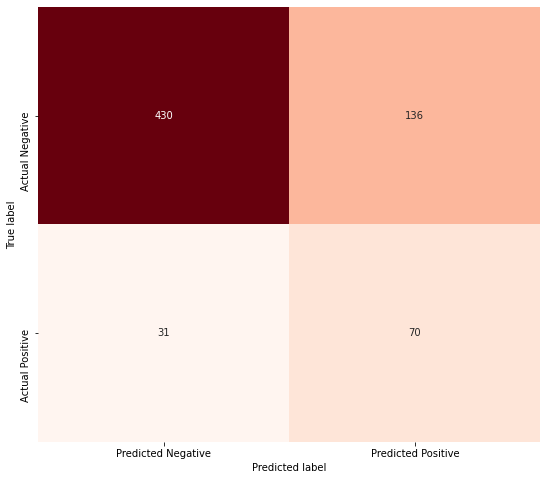

In [35]:
#generate predictions on the test set
y_pred = logreg.predict(X_test)

#confusion matrix
conf_matrix= confusion_matrix(y_test, y_pred)

#visualization of the matrix
plt.figure(figsize=(9,8))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
#plt.title( 'Confusion Matrix')
plt.show()

A higher number of true positives and true negatives indicates better performance , while the false positives or negatives highlight ares for improvement.

### Random Forest

 Since we are using Random Forest, we will balance the dataset this time by class weights

#### Balancing the dataset

In [36]:
# random forest with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# Train the Random Forest model on training data
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [37]:
#generate predictions on the test data
y_pred_rf= rf.predict(X_test)

In [38]:
# find accuracy
accuracy_rf= accuracy_score(y_test, y_pred_rf)

#find the precision
precision_rf= precision_score(y_test, y_pred_rf)

#find the recall
recall_rf= recall_score(y_test, y_pred_rf)

# find the f1_score
f1_rf= f1_score(y_test, y_pred_rf)

# find the roc and auc score
roc_auc_rf= roc_auc_score(y_test, y_pred_rf)

#print the Random Forest metrics

print('Random Forest Metrics:')
print( 'Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 score:', f1_rf)
print('ROC AUC Score:', roc_auc_rf)

Random Forest Metrics:
Accuracy: 0.9220389805097451
Precision: 0.9622641509433962
Recall: 0.504950495049505
F1 score: 0.6623376623376623
ROC AUC Score: 0.7507084630724556


#### points to note

The Random Forest model has an accuracy score of 92.2%, meaning its is able to correctly classify instances.

The model has achieved a precision of 96.2% showing a high rate of correctly prediting churn instance out of all the predicted churn instances.

The Recall is 50.5% which suggests that the model captures about half of the actual churn instances.

The F1 score is 66.2% which represents the balance between precision and recall, indicating moderate performance.

The ROC AUC Score is 75.1% suggesting that the model performs reasonably well in disguishing between churn and non-churn instances.

### Confusion Matrix

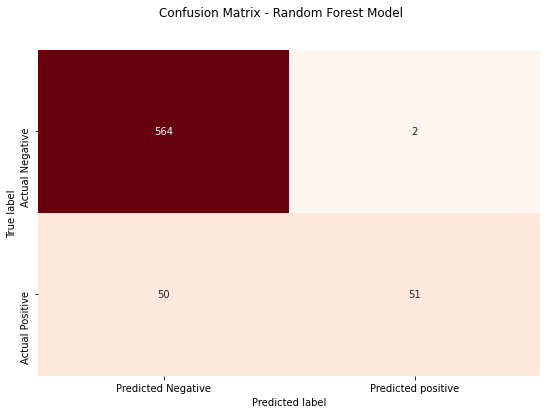

In [39]:
#Random Forest Confusion Matrix
con_matrix_rf= confusion_matrix(y_test, y_pred_rf)

#Visualize the matrix
plt.figure(figsize=(9,6))
sns.heatmap(con_matrix_rf, annot= True, cmap='Reds', fmt='g', cbar=False,
           xticklabels=['Predicted Negative', 'Predicted positive'],
           yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.suptitle('Confusion Matrix - Random Forest Model')
plt.show()


#### points to note

-There is a high number of true negatives and true posistives, indicating good performance in predicting both non-churn and churn instances.

-There is a small number of false positives and false negatives, suggesting that the model has relatively low misclassification rates. 

### Decision Tree Model

In [40]:
#calculate the performance metrixs

accuracy_dt= accuracy_score(y_test, y_pred_dt)
precision_dt= precision_score(y_test, y_pred_dt)
recall_dt= recall_score(y_test, y_pred_dt)
f1_dt= f1_score(y_test, y_pred_dt)

#AUC for decision Tree
auc_dt= roc_auc_score(y_test, y_pred_dt)

# print performance metrics
print('Accuracy:', accuracy_dt)
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1 Score:', f1_dt)
print('auc_dt', auc_dt)

NameError: name 'y_pred_dt' is not defined

#### Interpretation

The accuracy achieved 93.3%  is higher than the accuracy of random forest and Logistic regression.

The precision achieved is 78% indicating a lower rate of false positives, compared to logistic regression which had about 51.5%

The recall is 77.2% suggesting that the model captures about 77.2% of the churn instances.

F1 score is 77.6% which show the balance between the recall and the precision.

### Confusion Matrix

In [ ]:
# Predictions on the test set
y_pred_dt = dt_model.predict(X_test)

#Building the confusion matrix
conf_matrix_dt= confusion_matrix(y_test, y_pred_dt)

#Visualise the matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_dt, annot=True,cmap='Reds', fmt='g', cbar=False,
           xticklabels=['Predicted Negative', 'Predicted Positive'],
           yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.suptitle('The Decision Tree Matrix')
plt.show()

The model above correctly identified 78 instances as positive 

It correctly classified 544 instatnces as negative(non_churn) outnof the actual negative instances.

There were 22 instances incorrectly classified as positive (False positives).

There are 27 instances incorrectly classified as negative(False negatives)

### Hyperparameter tuning

In [ ]:
#define the parameter grid
param_grid= {
    'n_estimators':[50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4,],
    'max_features':['auto', 'sqrt', 'log2']}
#create the Random forest classifier
rf_model = RandomForestClassifier(random_state=42)
#grid search with five-fold cross-validation
grid_search= GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring= 'accuracy', n_jobs=-1)
#Fit the grd search to the data
grid_search.fit(X_train, y_train)
#Find the AUC score for the tuned Random Forest Classifier
auc_rf_tuned = roc_auc_score(y_test, y_pred_rf)
#get the best parameters and the best score
best_params= grid_search.best_params_
best_score= grid_search. best_score_

print("Best parameters:", best_params)
print("Best Accuracy Score:", best_score)
print("AUC:", auc_rf_tuned)

        

In [ ]:
#Instatiate the decision tree model and balance
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
#fit the model on training data
dt_model.fit(X_train, y_train)
#predict on test set
y_pred_dt= dt_model.predict(X_test)

### AUC values of logistic regression, Random Forest and Decision Tree Model

In [ ]:
#fit the random forest model to the training data
rf_model.fit(X_train, y_train)
#Predicted probabilities for logistic regression
y_prob_lr= logreg.predict_proba(X_test)[:,1]
#predicted probabilities for Random Forest
y_prob_rf= rf_model.predict_proba(X_test)[:,1]
#predicted probabilities for Decision Tree
y_prob_dt= dt_model.predict_proba(X_test)[:,1]

# ROC curve for Logistic Regression
fpr_lr, tpr_lr,_=roc_curve(y_test, y_prob_lr)
# ROC curve for Random Forest
fpr_rf, tpr_rf,_ = roc_curve(y_test, y_prob_rf)
# ROC  Curve for Decision Tree
fpr_dt, tpr_dt,_ = roc_curve(y_test, y_prob_dt)


In [ ]:
# AUC ROC scores
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_dt = roc_auc_score(y_test, y_prob_dt)

#plot ROC curves
plt.figure(figsize=(10,9))
plt.plot(fpr_lr, tpr_lr, label= f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest(AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f' Decision Tree(AUC = {auc_dt:.2f})')
         
#Plotting ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color= 'green')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


The Random Forest curve displays the best.

### Model Evaluation

#### Logistic Regression

Accuracy: 0.75,
Precision: 0.34,
Recall: 0.69,
F1_score: 0.46,
auc_lr: 0.73.

Summary:The model has a decent overall accuracy of 75%, but struggles  with low precision, leading to relative;y low F1 score and precision


#### Random Forest


Accuracy:0.92, precison:0.96, Recall:0.50, F1 score:0.66, 

The model performs well with high accuracy and precision, but has a moderate recall, indicating missed true positives.


#### Decision Tree

Accuracy: 0.93, Precision:0.78, Recall:0.77, F1 score: 0.78

The model achieves high accuracy with a good balance between precision and recall
and strong AUC performance.
                


#### Summary on Model Evaluation

The decision tree is the best model since it gives the best accuracy and strong AUC

### Conclusion

-Desision Tree has emerged as our best model.

-West virginia has the highesrt number of customers while Califonia has the lowest number of customers.

-There are more total evening calls compared to the rest of the calls, meaning that the syria tel customers prefer evening calls.

-There are more subcriptions to voice mail plan than international plan.

-As the number of customer service call increases the number of churn increases. This shows that the customers experience negative customer service, where their issues are not solved leading to increase in customer churn.


### Recommendatations

-The best model to be used to predict customer churn is The Decision Tree Model, since, it has a good balance between precision and recall, identifying the positive class instances and minimizing the false negatives and false positivesand has a 92% accuracy hence can predict churn.

-Most customers neither have an international plan nor a voice mail plan. The SyriaTel company should consider promotion services to their customers by displaying the benefits hence attracting more.

-The SyriaTel Company should identify influential predictors and usage patterns identified by the model to develop retention strategies.

-The company should put in place systems and the qualified personnel for customer serve, in order to asolve the customers needs fast and efficiency to ensure satisfaction hence customer retention.

### Future Steps

The Decision Tree Model has good accuracy and performance, despite this the company should continue monitoring and evaluating its performance on new data. This is because customer behaviours and preferences shift over time hence ensure the model remains effective and up-to-date.